In [165]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import os
import seaborn as sns
import charts_function_list
_,data,outputs = charts_function_list.folder_setup()

In [227]:
empty = []

url = "https://www.basketball-reference.com/teams/WAS"
html = urlopen(url) #get_request
soup = BeautifulSoup(html,"lxml") 

column_headers = [th.getText() for th in 
                  soup.findAll('tr', limit=2)[0].findAll('th')]

for i,v in enumerate(['WAS','MIL','TOR','ORL','MIA',
            'CLE','NJN','DET','CHA','IND',
             'BOS','ATL','PHI','NYK','CHI',
             'LAC','SAS','MEM','HOU',
             'MIN','POR','UTA','GSW','OKC',
             'NOH','LAL','DEN','PHO','SAC','DAL']):
    url = "https://www.basketball-reference.com/teams/"+v
    html = urlopen(url) #get_request
    soup = BeautifulSoup(html,"lxml") #load into beuatiful soup
    
    table_rows = soup.select('#'+v+' tr')[2:] #selecting table row elements from within Team css selector
    data = extract_player_data(table_rows)
    empty.append(pd.DataFrame(data, columns=column_headers,index=[i for x in range(len(data))]))

all_nba = pd.concat(empty)
all_nba['Team']=all_nba['Team'].str.strip('*')
all_nba['W/L%'] = all_nba['W/L%'].astype('float')

os.chdir('/Users/alexanderpudlin/Documents/GitHub/charts_and_more_charts/outputs')
all_nba.to_csv('ALL_NBA_team.csv')

### Post scraping

In [254]:
avg_win_percent_group = all_nba.groupby('Current Team').mean().sort_values(by='W/L%',ascending=False)
avg_win_percent_group['Rank']=[i+1 for i,v in enumerate(avg_win_percent_group.index)]

In [256]:
avg_win_percent_group

,W/L%,Rank
Current Team,,
San Antonio Spurs,0.604480,1
Los Angeles Lakers,0.597913,2
Boston Celtics,0.585451,3
Phoenix Suns,0.540449,4
Oklahoma City Thunder,0.539840,5
Utah Jazz,0.538395,6
Portland Trail Blazers,0.534872,7
Miami Heat,0.522828,8
Houston Rockets,0.520740,9


In [222]:

all_nba = pd.read_csv('ALL_NBA_team.csv',index_col=0)
all_nba['Current Team'] = pd.Series(all_nba.index).map(team_dictionary).values

In [273]:
all_nba['Current Team'].unique()

array(['Washington Wizards', 'Milwaukee Bucks', 'Toronto Raptors',
       'Orlando Magic', 'Miami Heat', 'Cleveland Cavaliers',
       'Brooklyn Nets', 'Detroit Pistons', 'Charlotte Hornets',
       'Indiana Pacers', 'Boston Celtics', 'Atlanta Hawks',
       'Philadelphia 76ers', 'New York Knicks', 'Chicago Bulls',
       'Los Angeles Clippers', 'San Antonio Spurs', 'Memphis Grizzlies',
       'Houston Rockets', 'Minnesota Timberwolves',
       'Portland Trail Blazers', 'Utah Jazz', 'Golden State Warriors',
       'Oklahoma City Thunder', 'New Orleans Pelicans',
       'Los Angeles Lakers', 'Denver Nuggets', 'Phoenix Suns',
       'Sacramento Kings', 'Dallas Mavericks'], dtype=object)

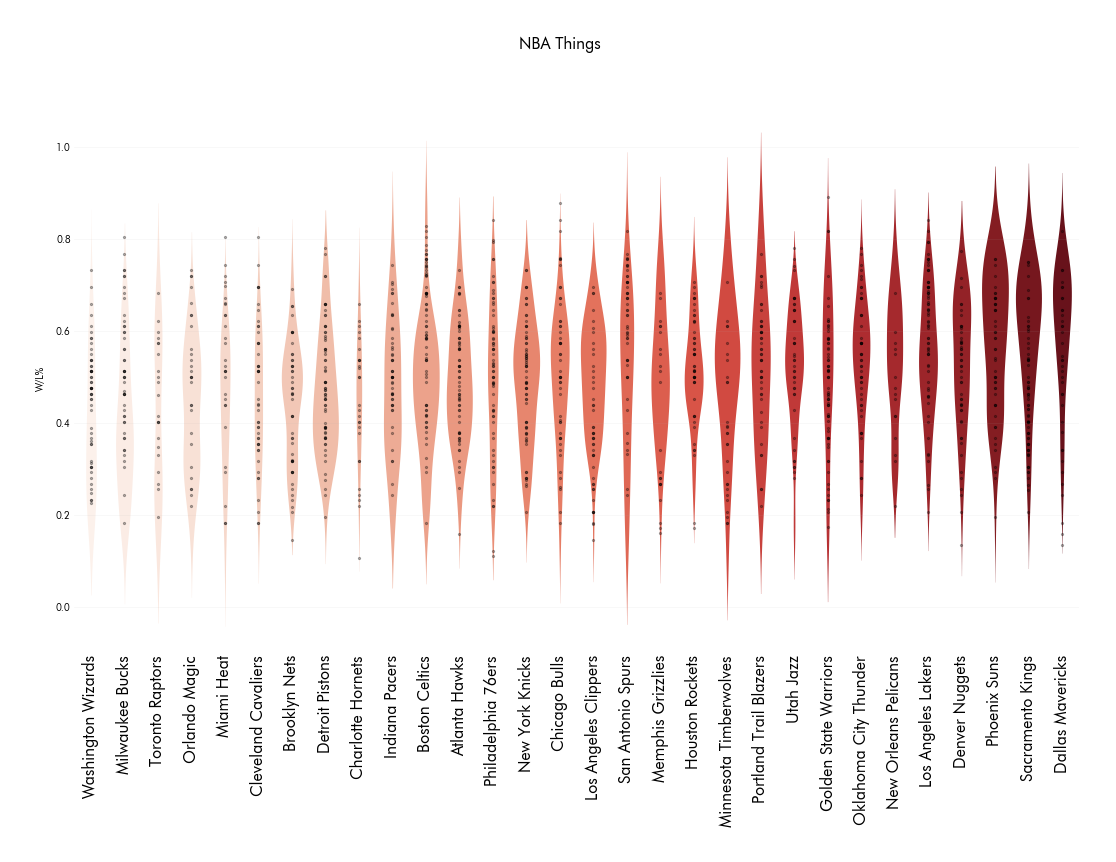

In [312]:
plt.rcParams["font.family"]='Futura Bk BT'
fig,ax = plt.subplots()
fig.suptitle('NBA Things')
fig.set_size_inches(18,10)
#sns.distplot(all_nba['W/L%'],kde=True,rug=True)
sns.violinplot(y='W/L%',x=all_nba.index,order=all_nba.groupby(all_nba.index).mean()['W/L%'].sort_values().index,data=all_nba,palette='Reds',linewidth=0,scale='count')
sns.regplot(x=all_nba.index.values, y='W/L%', data=all_nba, fit_reg=False,color='black',scatter_kws={'alpha':0.3,'s':5})

#sns.boxplot(y='W/L%',x=all_nba.index,data=all_nba,palette='Reds',order=all_nba.groupby(all_nba.index).mean()['W/L%'].sort_values().index)
#x_ticks = ax.set_xticks([x/10 for x in range(10)])
ax_text = ax.set_xticklabels(all_nba['Current Team'].unique(),rotation=90,fontsize=16)


#order=all_nba.groupby(all_nba.index).mean()['W/L%'].sort_values().index

In [232]:
team_dictionary = dict(all_nba[~all_nba.index.duplicated(keep='first')]['Team'])
all_nba['Current Team'] = pd.Series(all_nba.index).map(team_dictionary).values

In [240]:
for item in set(all_nba.index):
    print(item)
#len(set(all_nba.loc[0]['Current Team']))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [123]:
all_nba['Current Team'] = pd.Series(all_nba.index).map(team_dictionary).values

In [168]:
def extract_player_data(table_rows):
    """
    Extract and return the the desired information from the td elements within
    the table rows.
    """
    # create the empty list to store the player data
    player_data = []
    
    for row in table_rows:  # for each row do the following

        
        player_list = [th.get_text() for th in row.find_all("th")]+[td.get_text() for td in row.find_all("td")]

        if not player_list:
            continue

        player_data.append(player_list)
        
    return player_data

In [216]:
#noted that frame did not return data for all teams. To investigate:

empty_dict = {}

for i,v in enumerate(['WAS','MIL','TOR','ORL','MIA',
            'CLE','BRK','DET','CHO','IND',
             'BOS','ATL','PHI','NYK','CHI',
             'LAC','SAS','MEM','HOU',
             'MIN','POR','UTA','GSW','OKC',
             'NOP','LAL','DEN','PHO','SAC','DAL']):
    empty_dict[i] = v

def match_lookup():    
    non_match_keys = [x for x in set(empty_dict.keys()) if x not in all_nba.index.value_counts().sort_index().index]
    return non_match_keys 
    #if len(non_match_keys)>0:
     #   return [empty_dict[x] for x in [x for x in non_match_keys]]
    #else:
     #   return 'All keys match'

#more research shows URL forwarding

#NOP's ID is NOH
#BRK's ID is NJN
#CHO's ID is CHA

In [208]:
#non_match_keys = [x for x in set(empty_dict.keys()) if x not in all_nba.index.value_counts().sort_index().index]
#non_match_values = [empty_dict[x] for x in [x for x in non_match_keys]]
#non_match_values

['CHO']